In [1]:
from transformers import pipeline

In [3]:
# we will use the SlimSAM model for the mask generation paper here-> https://arxiv.org/abs/2304.02643
sam_pipe = pipeline("mask-generation", "Zigeng/SlimSAM-uniform-77")

config.json:   0%|          | 0.00/364 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/38.9M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

In [4]:
from PIL import Image

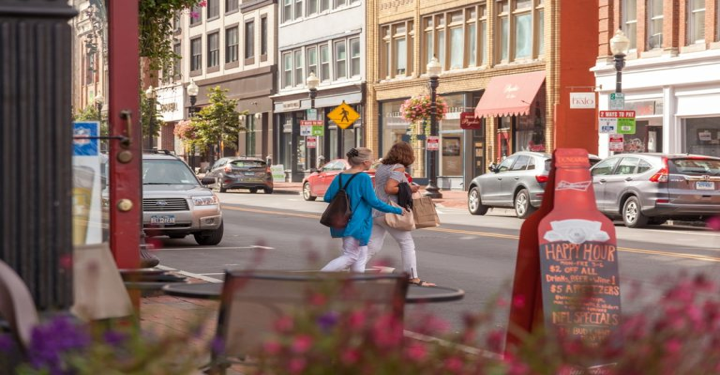

In [7]:
raw_image = Image.open('../data/town.jpeg')
raw_image.resize((720, 375))

In [9]:
output = sam_pipe(raw_image, points_per_batch=32)

Faster inference single point

In [10]:
from transformers import SamModel, SamProcessor

In [11]:
model = SamModel.from_pretrained("Zigeng/SlimSAM-uniform-77")
processor = SamProcessor.from_pretrained("Zigeng/SlimSAM-uniform-77")

In [14]:
#lets see the architecture of the model
model

SamModel(
  (shared_image_embedding): SamPositionalEmbedding()
  (vision_encoder): SamVisionEncoder(
    (patch_embed): SamPatchEmbeddings(
      (projection): Conv2d(3, 168, kernel_size=(16, 16), stride=(16, 16))
    )
    (layers): ModuleList(
      (0-11): 12 x SamVisionLayer(
        (layer_norm1): LayerNorm((168,), eps=1e-06, elementwise_affine=True)
        (attn): SamVisionAttention(
          (qkv): Linear(in_features=168, out_features=504, bias=True)
          (proj): Linear(in_features=168, out_features=168, bias=True)
        )
        (layer_norm2): LayerNorm((168,), eps=1e-06, elementwise_affine=True)
        (mlp): SamMLPBlock(
          (lin1): Linear(in_features=168, out_features=696, bias=True)
          (lin2): Linear(in_features=696, out_features=168, bias=True)
          (act): GELUActivation()
        )
      )
    )
    (neck): SamVisionNeck(
      (conv1): Conv2d(168, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (layer_norm1): SamLayerNorm()
      (c

In [16]:
#give some a random single point to the model to segment

input_points = [[[1200, 600]]]

In [17]:
inputs = processor(raw_image,
                 input_points=input_points,
                 return_tensors="pt")

In [18]:
import torch

In [19]:
with torch.no_grad():
    outputs = model(**inputs)

In [20]:
predicted_masks = processor.image_processor.post_process_masks(
    outputs.pred_masks,
    inputs["original_sizes"],
    inputs["reshaped_input_sizes"]
)

In [21]:
len(predicted_masks)

1

In [22]:
predicted_mask = predicted_masks[0]
predicted_mask.shape

torch.Size([1, 3, 512, 768])

In [23]:
outputs.iou_scores

tensor([[[0.7395, 0.8192, 0.4089]]])

Todo make a function for viewing the images